In [26]:
#importing libraries as needed
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import os.path
from pathlib import Path
import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

from keras.models import load_model
import keras

import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image 
from PIL.ImageDraw import Draw

In [2]:
#read in csv files
csv_path = 'chest_xrays_files/csv_files/'
df_BB_id = pd.read_csv(csv_path + 'BBox_List_2017.csv')

df_BB_id.rename(columns = {'Image Index':'id'}, inplace = True)
df_BB_id.rename(columns = {'Finding Label':'Finding_Label'}, inplace = True)
df_BB_id.rename(columns = {'Bbox [x':'x'}, inplace = True)
df_BB_id.rename(columns = {'y':'y'}, inplace = True)
df_BB_id.rename(columns = {'w':'w'}, inplace = True)
df_BB_id.rename(columns = {'h]':'h'}, inplace = True)

conditions = ["Atelectasis","Cardiomegaly","Effusion","Infiltrate","Mass","Nodule","Pneumonia", "Pneumothorax"]
df_BB_Lung_Cancer = df_BB_id[['id','Finding_Label','x','y','w','h']]

df_BB_Lung_Cancer = df_BB_Lung_Cancer.drop(df_BB_Lung_Cancer[(df_BB_Lung_Cancer.Finding_Label=="Cardiomegaly")].index)

cancer_values = [0,1]

df_BB_Lung_Cancer.rename(columns = {'Finding_Label':'Cancer'}, inplace = True)

df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Atelectasis',cancer_values[0])
df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Effusion',cancer_values[0])
df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Infiltrate',cancer_values[0])
df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Pneumonia',cancer_values[0])
df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Pneumothorax',cancer_values[0])

df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Mass',cancer_values[1])
df_BB_Lung_Cancer['Cancer'] = df_BB_Lung_Cancer['Cancer'].replace('Nodule',cancer_values[1])

display(df_BB_Lung_Cancer)

,id,Cancer,x,y,w,h
0,00013118_008.png,0,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,0,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,0,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,0,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,0,660.067797,569.780787,200.677966,78.101695
...,...,...,...,...,...,...
979,00029464_015.png,0,198.940451,352.900747,615.537778,323.128889
980,00025769_001.png,0,701.838229,572.491858,103.537778,63.715556
981,00016837_002.png,0,140.913785,658.962969,271.928889,94.435556
982,00020124_003.png,0,175.047118,580.456302,244.622222,103.537778


In [3]:
cancer_only_set = df_BB_Lung_Cancer[(df_BB_Lung_Cancer.Cancer == 1)] 
display(cancer_only_set)
cancer_only_set.to_csv(csv_path+'cancer_only_set.csv', index=False)

,id,Cancer,x,y,w,h
583,00023075_033.png,1,239.502222,535.077934,72.817778,65.991111
584,00029579_005.png,1,609.280000,189.193490,73.955556,71.680000
585,00013659_019.png,1,559.217778,167.575712,102.400000,136.533333
586,00010815_006.png,1,311.182222,241.531267,146.773333,256.000000
587,00026695_000.png,1,341.902222,197.157934,117.191111,131.982222
...,...,...,...,...,...,...
742,00013674_000.png,1,210.217989,319.661376,58.514286,57.430688
743,00013751_003.png,1,676.165079,610.065608,89.938624,89.938624
744,00010103_014.png,1,343.500529,412.850794,41.176720,45.511111
745,00011576_000.png,1,206.967196,582.975661,46.594709,41.176720


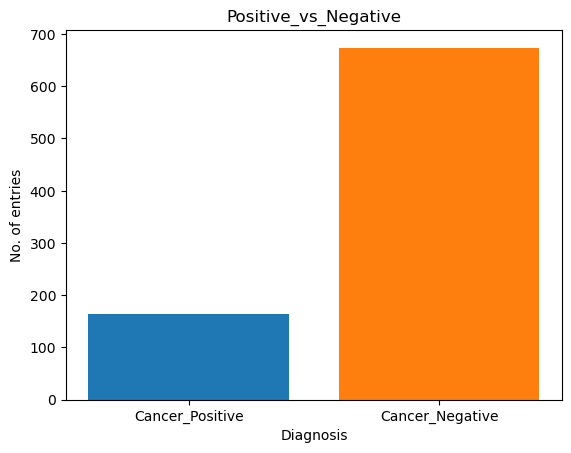

In [4]:
#plot of data
cancer_positive = len(df_BB_Lung_Cancer[df_BB_Lung_Cancer['Cancer'] == 1].index)
cancer_negative = len(df_BB_Lung_Cancer[df_BB_Lung_Cancer['Cancer'] == 0].index)
  
plt.bar('Cancer_Positive' ,cancer_positive, label= 'Positive')
plt.bar('Cancer_Negative' ,cancer_negative, label = 'Negative')
plt.xlabel("Diagnosis")
plt.ylabel("No. of entries")
plt.title("Positive_vs_Negative")
plt.show()

In [5]:
#add pathing to front of images in csv (chest_xrays/)
df_BB_Lung_Cancer['id'] = 'chest_xrays_files/chest_xrays/' + df_BB_Lung_Cancer['id'].astype(str)
#cancer_only_set['id'] = 'chest_xrays_files/chest_xrays/' + cancer_only_set['id'].astype(str)
cancer_only_set.to_csv(csv_path+'cancer_only_set.csv', index=False)
df_BB_Lung_Cancer.to_csv(csv_path+'BB_Lung_id.csv', index=False)

display(cancer_only_set)

,id,Cancer,x,y,w,h
583,00023075_033.png,1,239.502222,535.077934,72.817778,65.991111
584,00029579_005.png,1,609.280000,189.193490,73.955556,71.680000
585,00013659_019.png,1,559.217778,167.575712,102.400000,136.533333
586,00010815_006.png,1,311.182222,241.531267,146.773333,256.000000
587,00026695_000.png,1,341.902222,197.157934,117.191111,131.982222
...,...,...,...,...,...,...
742,00013674_000.png,1,210.217989,319.661376,58.514286,57.430688
743,00013751_003.png,1,676.165079,610.065608,89.938624,89.938624
744,00010103_014.png,1,343.500529,412.850794,41.176720,45.511111
745,00011576_000.png,1,206.967196,582.975661,46.594709,41.176720


In [14]:
df = pd.read_csv(csv_path+'cancer_only_set.csv',)

images = {}
for index, row in df.iterrows():
    img = cv2.imread("chest_xrays_files/chest_xrays/"+row[0])
    x = int(np.float32(row[2]))
    y = int(np.float32(row[3])) 
    w = int(np.float32(row[4]))
    h = int(np.float32(row[5]))
            
    # Draw the bounding box on the image
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    images[row[0]] = img

print(images.keys())    

dict_keys(['00023075_033.png', '00029579_005.png', '00013659_019.png', '00010815_006.png', '00026695_000.png', '00010125_004.png', '00026261_001.png', '00010277_000.png', '00002106_000.png', '00019313_000.png', '00018623_001.png', '00020124_003.png', '00026196_001.png', '00028698_001.png', '00016184_040.png', '00017214_015.png', '00020065_008.png', '00011925_072.png', '00021201_010.png', '00013911_021.png', '00021179_011.png', '00006821_002.png', '00011151_004.png', '00027833_022.png', '00012376_010.png', '00020274_007.png', '00028265_007.png', '00028027_000.png', '00018762_001.png', '00018366_010.png', '00022837_005.png', '00008008_027.png', '00001787_008.png', '00017257_001.png', '00029105_015.png', '00011269_019.png', '00012376_011.png', '00013508_001.png', '00012975_003.png', '00011157_001.png', '00001836_082.png', '00023168_000.png', '00016568_010.png', '00014731_028.png', '00025529_018.png', '00003440_000.png', '00019651_002.png', '00027556_007.png', '00011291_003.png', '00019499

In [34]:
path = "chest_xrays_files/bb_cancer_images/"
if os.path.exists(path)==False:
    os.makedirs(path)
    #if len(dir)==0:
    print("Currently empty: adding in images")
    for id in images.keys():
        cv2.imwrite(r"chest_xrays_files/bb_cancer_images/" + id, images[id])

Currently empty: adding in images


## Training, Validation, and Testing Image Generation

In [ ]:
#(Need to somehow split this data)

## Model Creation

In [27]:
width = 256
height = 256

#create the common input layer
input_shape = (height, width, 3)
input_layer = keras.layers.Input(input_shape)

#create the base layers
base_layers = layers.experimental.preprocessing.Rescaling(1./255, name='bl_1')(input_layer)
base_layers = layers.Conv2D(16, 3, padding='same', activation='relu', name='bl_2')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_3')(base_layers)
base_layers = layers.Conv2D(32, 3, padding='same', activation='relu', name='bl_4')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_5')(base_layers)
base_layers = layers.Conv2D(64, 3, padding='same', activation='relu', name='bl_6')(base_layers)
base_layers = layers.MaxPooling2D(name='bl_7')(base_layers)
base_layers = layers.Flatten(name='bl_8')(base_layers)

locator_branch = layers.Dense(128, activation='relu', name='bb_1')(base_layers)
locator_branch = layers.Dense(64, activation='relu', name='bb_2')(locator_branch)
locator_branch = layers.Dense(32, activation='relu', name='bb_3')(locator_branch)
locator_branch = layers.Dense(4, activation='sigmoid', name='bb_head')(locator_branch)

In [28]:
model = tf.keras.Model(input_layer,outputs=locator_branch)
losses = {"bb_head":tf.keras.losses.MSE}
model.compile(loss=losses, optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(Train_IMG_Set, validation_data= Validation_IMG_Set,
             batch_size=4,
             epochs=20,
             shuffle=True,
             verbose=1)